In [41]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

p = Path(Path.cwd()).resolve().parents[2] / "introduction" / "datasets" / "Online Retail.csv"
raw_df = pd.read_csv(p)
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Data Pre-Processing

In [44]:
df = raw_df.copy()
df.info()
df.dropna(subset=['CustomerID'], inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(406829, 8)

In [53]:
int_cols = df.select_dtypes(include=['int64','float64'])


In [54]:
negative_counts = int_cols.apply(lambda x: (x <0).sum())

In [55]:
negative_counts

Quantity      8905
UnitPrice        0
CustomerID       0
dtype: int64

In [56]:
int_cols

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [57]:
cleaned_df= df[(int_cols >= 0).all(axis=1)]

In [58]:
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [59]:
features = df[['Quantity', 'UnitPrice']]

In [60]:
features

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Fit K-Means Model

In [76]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



#### Plot the elbow method Graph

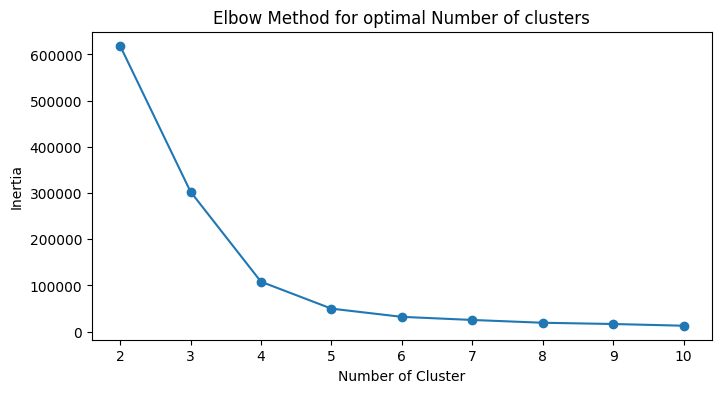

In [78]:
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal Number of clusters')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

#### Visualize the clusters

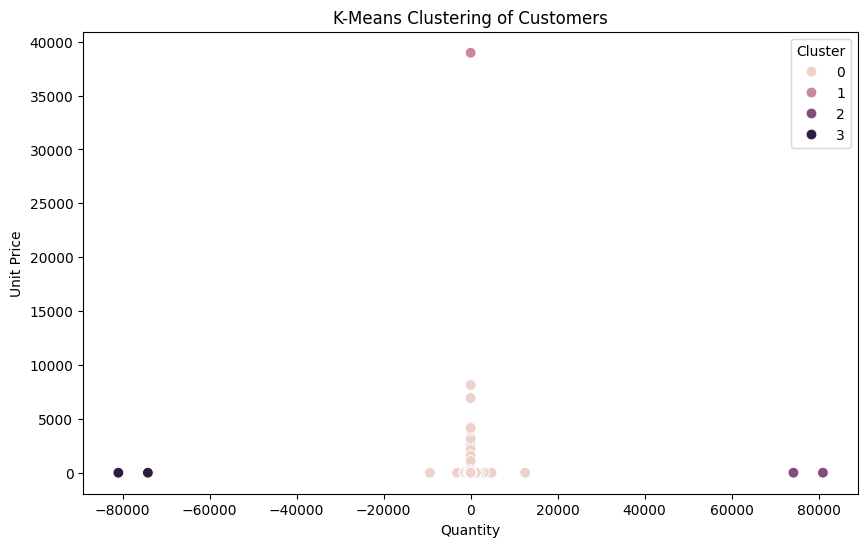

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity',
                y='UnitPrice',
                hue='Cluster',
                s=60)
plt.title("K-Means Clustering of Customers")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.legend(title="Cluster")
plt.show()